<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!unzip '/content/loan_approval_dataset.json.zip'

Archive:  /content/loan_approval_dataset.json.zip
  inflating: loan_approval_dataset.json  


In [ ]:
df = pd.read_json("/content/loan_approval_dataset.json")

In [ ]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


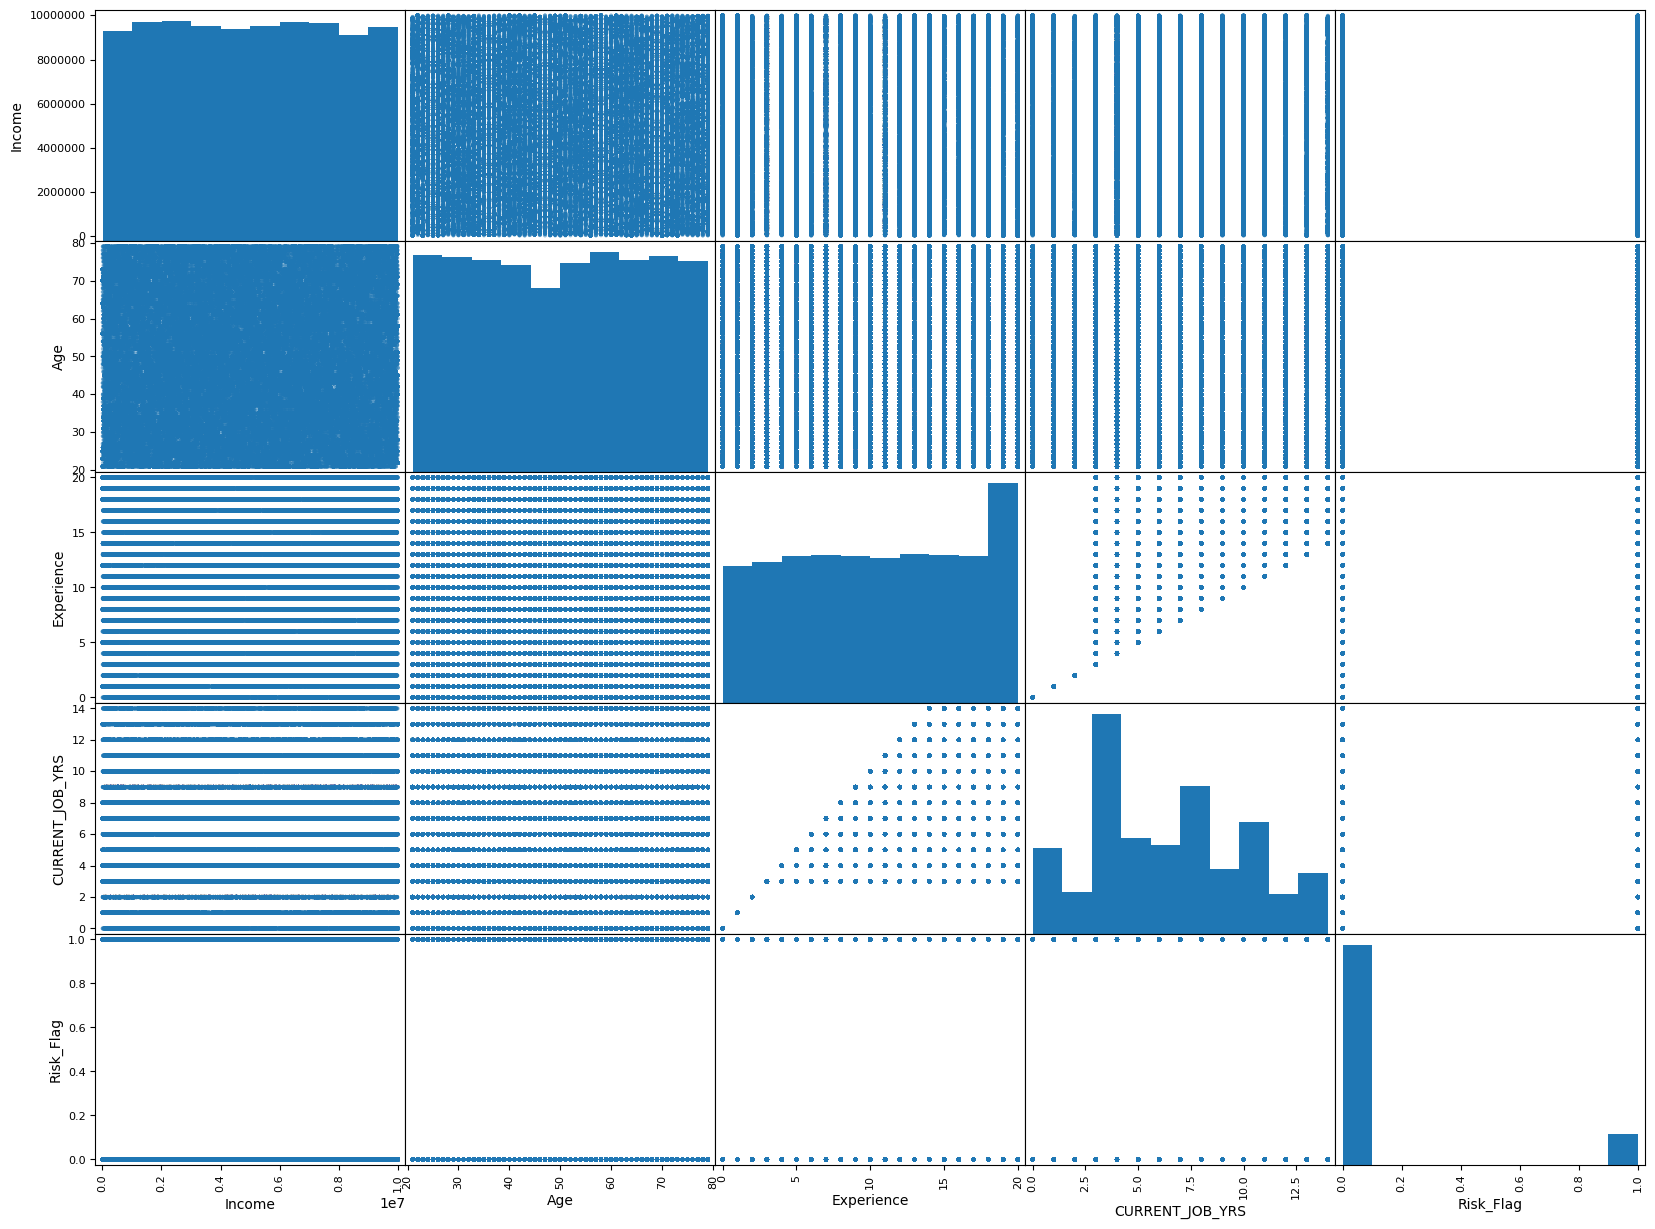

In [ ]:
from pandas.plotting import scatter_matrix
atributes = ['Income', 'Age', 'Experience',
       'CURRENT_JOB_YRS',"Risk_Flag"]
scatter_matrix(df[atributes],figsize = (20,15));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [ ]:
df = df.drop("Id",axis = 1)

In [ ]:
df["CITY"].value_counts()

CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64

In [ ]:
df["STATE"].value_counts()

STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64

In [ ]:

df["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [ ]:
df[:22000]

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21995,6453233,68,13,single,rented,no,Drafter,Thiruvananthapuram,Kerala,13,14,0
21996,9304920,44,6,single,rented,no,Physician,Dharmavaram,Andhra_Pradesh,6,11,0
21997,5445375,52,19,single,rented,no,Psychologist,Kulti,West_Bengal,5,12,0
21998,706809,71,3,single,rented,no,Librarian,Coimbatore,Tamil_Nadu,3,13,1


In [ ]:
# columns_0_22000=df[df["Risk_Flag"]==0][:22000]
# columns_1_3000=df[df["Risk_Flag"]==0][:3000]

In [ ]:
# df1 = pd.concat([columns_0_22000, columns_1_3000])

In [ ]:
X = df.drop("Risk_Flag",axis = 1)
y = df["Risk_Flag"].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
cat_features = X_train.select_dtypes(exclude=[np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
cat_pipeline =Pipeline([
    ["one_hot",OneHotEncoder()]
])
num_pipeline = Pipeline([
    ["st_scaler",StandardScaler()]
])
transformer = ColumnTransformer([
    ["cat_transform",cat_pipeline,cat_features],
    ["num_transform",num_pipeline,num_features]
],remainder = "passthrough")

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_clf = DecisionTreeClassifier()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
class_weights = {0: 0.3, 1: 0.7}

In [ ]:
rnd_clf = RandomForestClassifier(class_weight=class_weights, min_samples_split=5,n_estimators=400, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter = 100000)

In [ ]:
dec_clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
dec_clf.score(X_test_transformed,y_test)

0.8851984126984127

In [ ]:
dec_clf.score(X_train_transformed,y_train)

0.9364136904761905

In [ ]:
rnd_clf.fit(X_train_transformed,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_split=5,
                       n_estimators=400, random_state=42)

In [ ]:
rnd_clf.score(X_test_transformed,y_test)

0.8959920634920635

In [ ]:
log_reg.fit(X_train_transformed,y_train)

LogisticRegression(max_iter=100000)

In [ ]:
log_reg.score(X_test_transformed,y_test)

0.8759325396825397

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy=0.5,random_state = 1)
X_train_res, y_train_res = sm.fit_resample(X_train_transformed, y_train.ravel())

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred_train = cross_val_predict(rnd_clf,X_train_res,y_train_res,cv = 3)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_res,y_pred_train)

0.8888305481587845

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(estimators=[
        ('lr', log_reg),
        ('rf',rnd_clf),
        ('gnb', dec_clf)], voting='soft')